# Rate of Change (ROC)

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:rate_of_change_roc_and_momentum

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2016-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,99.499107,67649400
2016-01-05,105.750000,105.849998,102.410004,102.709999,97.005730,55791000
2016-01-06,100.559998,102.370003,99.870003,100.699997,95.107361,68457400
2016-01-07,98.680000,100.129997,96.430000,96.449997,91.093399,81094400
2016-01-08,98.550003,99.110001,96.760002,96.959999,91.575073,70798000


In [3]:
n = 12
df['ROC'] = ((df['Adj Close'] - df['Adj Close'].shift(n))/df['Adj Close'].shift(n)) * 100

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,ROC
Date,,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,99.499107,67649400,NaN
2016-01-05,105.750000,105.849998,102.410004,102.709999,97.005730,55791000,NaN
2016-01-06,100.559998,102.370003,99.870003,100.699997,95.107361,68457400,NaN
2016-01-07,98.680000,100.129997,96.430000,96.449997,91.093399,81094400,NaN
2016-01-08,98.550003,99.110001,96.760002,96.959999,91.575073,70798000,NaN


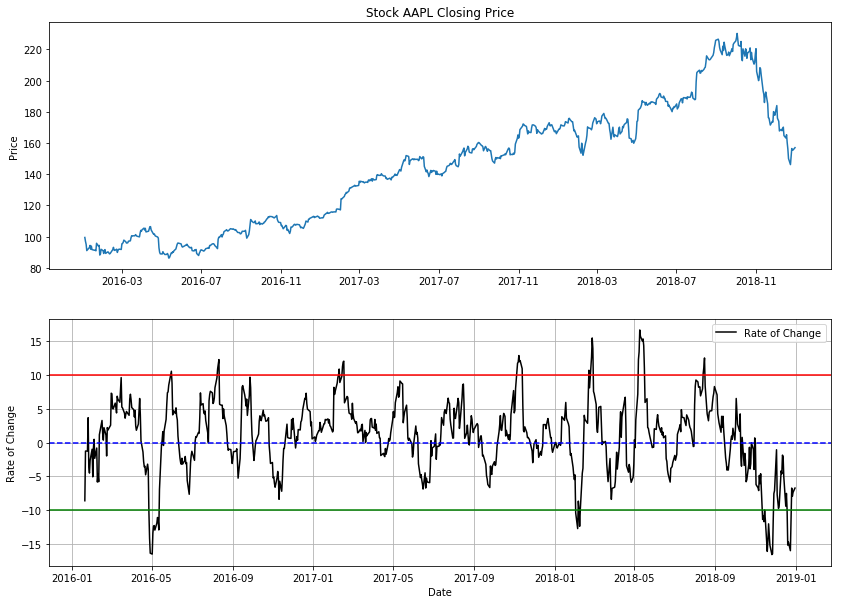

In [5]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['ROC'], label='Rate of Change', color='black')
ax2.axhline(y=0, color='blue', linestyle='--')
ax2.axhline(y=10, color='red')
ax2.axhline(y=-10, color='green')
ax2.grid()
ax2.set_ylabel('Rate of Change')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## 

## Candlestick with (ROC)

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ROC,VolumePositive
0,735967.0,102.610001,105.370003,102.000000,105.349998,99.499107,67649400,NaN,False
1,735968.0,105.750000,105.849998,102.410004,102.709999,97.005730,55791000,NaN,False
2,735969.0,100.559998,102.370003,99.870003,100.699997,95.107361,68457400,NaN,False
3,735970.0,98.680000,100.129997,96.430000,96.449997,91.093399,81094400,NaN,False
4,735971.0,98.550003,99.110001,96.760002,96.959999,91.575073,70798000,NaN,False


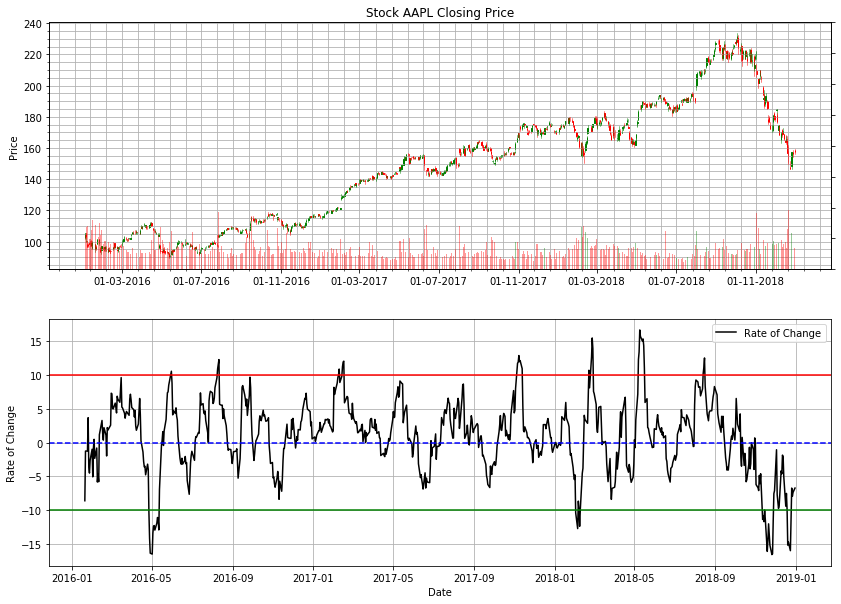

In [7]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['ROC'], label='Rate of Change', color='black')
ax2.axhline(y=0, color='blue', linestyle='--')
ax2.axhline(y=10, color='red')
ax2.axhline(y=-10, color='green')
ax2.grid()
ax2.set_ylabel('Rate of Change')
ax2.set_xlabel('Date')
ax2.legend(loc='best')